*Ressources numériques – Programme BCPST2 2022*
---


---
# Oscillateur : régime harmonique ou non harmonique
---

**Capacité numérique disciplinaire :**  à l’aide d’un langage de program- mation, mettre en évidence le non isochronisme des os- cillations d’un oscillateur anharmonique.


---








Le script aborde le modèle du pendule simple sans amortissement. L'équation différentielle du mouvement dans le référentiel terrestre supposé galiléen est :

\begin{equation} 
\mathsf{
    \frac{d^2 \theta}{dt^2} +\frac{g}{l} sin(\theta) =0
}
\end{equation}

où l'angle $\mathsf{{\theta}}$ est l'angle entre la verticale et le fil tendu.


Plusieurs aspects sont abordés :
* Résolution numérique de l'équation différentielle sans mettre en oeuvre l'approximation "des petits angles", 
* Confrontation des solutions obtenues avec ou sans l'approximation des petits angles pour illustrer le domaine de validité de cette aproximation,
* Tracés de l'évolution temporelle de l'énergie cinétique, de l'énergie potentielle et de l'énergie mécanique.




### Bibliothèques utilisées

La bibliothèque `numpy` est utilisée pour sa collection de fonctions (sin par exemple) et pour générer une liste d'abscisses avec la fonction `linspace`.

La bibliothèque `matplotlib` est utilisée pour tracer des graphiques. 

Le module `integrate` de la bibliothèque `scipy` permet d'intégrer numériquement une équation différentielle.



---
# 1 - Principe de la résolution numérique par `odeint`
---

L'intégration de l'équation différentielle est ici réalisée grâce à la fonction `odeint`. Il est nécessaire de définir une fonction $\mathsf{f}$ qui dérive un vecteur $\mathsf{X}$ dont les composantes sont $\mathsf{{\theta}}$ et $\mathsf{\frac{d\theta}{dt}}$.

Exemple avec l'équation différentielle précédemment décrite :
\begin{equation} 
\mathsf{
    \frac{d^2 \theta}{dt^2} +\frac{g}{l} sin(\theta) =0
}
\end{equation}

\begin{equation}
\mathsf{
    f : \begin{pmatrix}
            \theta \\
            \frac{d\theta}{dt}
        \end{pmatrix}
    \mapsto 
        \begin{pmatrix}
            \frac{d\theta}{dt} \\
            -\frac{g}{l} sin(\theta)
    \end{pmatrix}
}
\end{equation}

Les trois arguments de `odeint` sont :
* la fonction $\mathsf{f}$,
* les conditions initiales sous forme d'une liste,
* la liste des temps `t`.

`odeint` renvoie un tableau dont la première colonne est la liste des valeurs successives de $\mathsf{\theta}$, et la seconde celle des valeurs succesives de la dérivée première $\mathsf{\frac{d\theta}{dt}}$.

Pour extraire une partie des données : 
* liste des valeurs de $\mathsf{\theta}$ : ajouter `[:,0]` (1ère colonne)
* liste des valeurs de $\mathsf{\frac{d\theta}{dt}}$ : ajouter `[:,1]` (2ème colonne)



---
# 2 - Influence des conditions initiales sur la période du pendule simple
---


Le script génère des graphiques permettant de comparer la période des oscillations du pendule simple en fonction des conditions initiales :
* vitesse initiale nulle, amplitude initiale variable ;
* vitesse initiale non nulle, amplitude initiale nulle.

Les courbes générées permettent de visualiser le non-isochronisme des oscillations.

**Manipulation du script**

L'utilisateur peut notamment modifier les valeurs des valeurs initiales d'angle ou de vitesse.
A noter que pour des vitesses initiales trop élevées, il n'est pas constaté de régime d'oscillations mais un mouvement circulaire non uniforme.

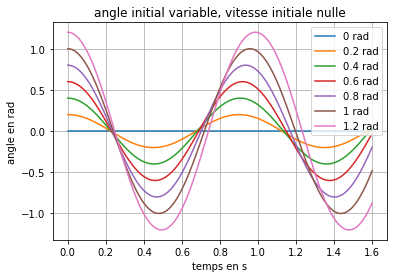

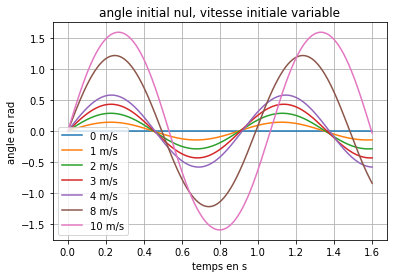

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#Saisie de données (longueur, accélération pesanteur, vitesse initiale en m/s, angle initial en rad)
l=0.2     #m  
g=9.8     #m/s2  
Ltheta0=[0,0.2,0.4,0.6,0.8,1,1.2]  
Lv0=[0,1,2,3,4,8,10] 
t = np.linspace(0,1.6,1000)


#%%# Résolution de l'équation différentielle du second ordre sans approximation
def f(X,t):
    theta,theta_point = X
    return theta_point,-g/l*np.sin(theta)

def angle(theta0,v0):
    return odeint(f,[theta0,v0],t)[:,0]
    # Retourne la liste des angles (1ère colonne)

def vitesse(theta0,v0):
    return odeint(f,[theta0,v0],t)[:,1]
    # Retourne la liste des dérivées premières de l'angle (2ème colonne)
    

#Simulation avec angle initial variable, vitesse initiale nulle
plt.figure(1)
v0=0
for theta0 in Ltheta0 :
    plt.plot(t,angle(theta0,v0),label=f'{theta0} rad')
plt.xlabel('temps en s')
plt.ylabel('angle en rad')
plt.title('angle initial variable, vitesse initiale nulle')
plt.grid()
plt.legend() 
plt.show()

#Simulation avec angle initial nul, vitesse initiale variable
plt.figure(2)
theta0=0
for v0 in Lv0 :
    plt.plot(t,angle(theta0,v0),label=f'{v0} m/s')
plt.xlabel('temps en s')
plt.ylabel('angle en rad')
plt.title('angle initial nul, vitesse initiale variable')
plt.grid()
plt.legend() 
plt.show()

---
# 3 - Comparaison avec ou sans approximation des petits angles
---

Le script génère des graphiques permettant de comparer le résultat de l'intégration numérique de l'équation du mouvement avec l'approximation des petits angles ou sans cette approximation. 


**Manipulation du script**

L'utilisateur peut modifier les valeurs des vitesses initiales.

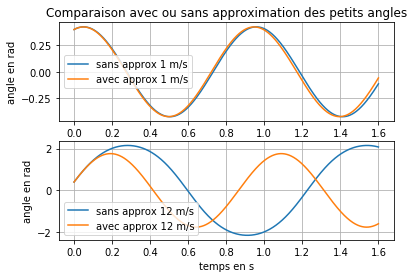

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#Saisie de données (longueur, accélération pesanteur, vitesses initiales en m/s, angle initial en rad)
l=0.2       #m
g=9.8       #m/s2
theta0=0.4
t = np.linspace(0,1.6,1000)


# Fonctions pour la résolution SANS approximation
def f(X,t):
    theta,theta_point = X
    return theta_point,-g/l*np.sin(theta)

def angle(theta0,v0):
    return odeint(f,[theta0,v0],t)[:,0]


# Fonctions pour la résolution AVEC approximation
def f_approx(X,t):
    theta,theta_point = X
    return theta_point,-g/l*theta

def angle_approx(theta0,v0):
    return odeint(f_approx,[theta0,v0],t)[:,0]


# Tracés
plt.subplot(211)
plt.title('Comparaison avec ou sans approximation des petits angles')
v0=1
plt.plot(t,angle(theta0,v0),label=f'sans approx {v0} m/s')
plt.plot(t,angle_approx(theta0,v0),label=f'avec approx {v0} m/s')
plt.xlabel('temps en s')
plt.ylabel('angle en rad')
plt.grid()
plt.legend() 

plt.subplot(212)
v0=12   
plt.plot(t,angle(theta0,v0),label=f'sans approx {v0} m/s')
plt.plot(t,angle_approx(theta0,v0),label=f'avec approx {v0} m/s')
plt.xlabel('temps en s')
plt.ylabel('angle en rad')
plt.grid()
plt.legend() 
plt.show()


---
# 4 - Aspect énergétique
---


Le script calcule les valeurs de l'énergie cinétique et de l'énergie potentielle à chaque instant. Ces énergies sont sommées pour obtenir l'énergie mécanique. 


**Manipulation du script**

L'utilisateur peut modifier les valeurs des vitesses initiales à comparer.

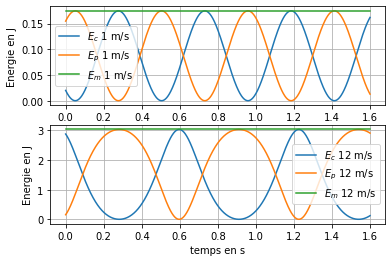

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#Saisie de données (longueur, accélération pesanteur, vitesses initiales en m/s, angle initial en rad)
l=0.2       #m
g=9.8       #m/s2
Ltheta0=[0,0.2,0.4,0.6,0.8,1,1.2]  
Lv0=[0,1,2,3,4,8,10] 
t = np.linspace(0,1.6,1000)


# Fonctions pour la résolution SANS approximation
def f(X,t):
    theta,theta_point = X
    return theta_point,-g/l*np.sin(theta)

def angle(theta0,v0):
    return odeint(f,[theta0,v0],t)[:,0]

def vitesse(theta0,v0):
    return odeint(f,[theta0,v0],t)[:,1]

def Ec(theta0,v0):
    return .5*l**2*vitesse(theta0,v0)**2

def Ep(theta0,v0):
    return g*l*(1-np.cos(angle(theta0,v0)))

plt.figure(4)
plt.title('Energie')

# Superposition des tracés d'énergies pour deux vitesses initiales
plt.subplot(211)
v0=1
plt.plot(t,Ec(theta0,v0),label=f'$E_c$ {v0} m/s ')
plt.plot(t,Ep(theta0,v0),label=f'$E_p$ {v0} m/s')
plt.plot(t,Ec(theta0,v0)+Ep(theta0,v0),label=f'$E_m$ {v0} m/s')
plt.xlabel('temps en s')
plt.ylabel('Energie en J')
plt.grid()
plt.legend() 

plt.subplot(212)
v0=12
plt.plot(t,Ec(theta0,v0),label=f'$E_c$ {v0} m/s ')
plt.plot(t,Ep(theta0,v0),label=f'$E_p$ {v0} m/s')
plt.plot(t,Ec(theta0,v0)+Ep(theta0,v0),label=f'$E_m$ {v0} m/s')
plt.xlabel('temps en s')
plt.ylabel('Energie en J')
plt.grid()
plt.legend() 

plt.show()


Dans les deux cas, conformément à l'hypothèse d'une absence de frottements fluides, le système est conservatif. 